<a href="https://colab.research.google.com/github/RuwanPradeep0/Machine-Learning-Module-EC9630/blob/main/LAB02_2020E028.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EC9630 Machine Learning - Labority 02

Task :

Name : Dasanayaka D.G.R.P

Reg No : 2020/E/028

Date :

Time :


**1. Load the Data**

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the data
url = 'https://archive.ics.uci.edu/static/public/275/data.csv'
data = pd.read_csv(url)

In [4]:
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**2. Preprocessing Steps**

In [5]:
# Drop the 'instant' column as it is just an index
data.drop(columns=['instant'], inplace=True)

In [6]:
# One-hot encode categorical variables
categorical_features = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']
data = pd.get_dummies(data, columns=categorical_features, drop_first=True)

# Separate features and target
X = data.drop(columns=['dteday', 'casual', 'registered', 'cnt'])
y = data['cnt']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
X_train


array([[-1.54083688, -1.62031134, -0.3994488 , ..., -0.59720596,
        -0.2975787 , -0.01199477],
       [ 0.1171121 ,  0.13822833, -1.07374273, ..., -0.59720596,
        -0.2975787 , -0.01199477],
       [-0.19375333, -0.12584281,  1.93464557, ..., -0.59720596,
         3.36045553, -0.01199477],
       ...,
       [ 1.56781745,  1.45742327, -1.02187397, ..., -0.59720596,
        -0.2975787 , -0.01199477],
       [-1.33359326, -1.62031134,  0.11923884, ..., -0.59720596,
        -0.2975787 , -0.01199477],
       [ 0.1171121 ,  0.13822833,  1.05287659, ...,  1.6744642 ,
        -0.2975787 , -0.01199477]])

**3. Fit the Linear Regression Model**

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate errors
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

mae, mse, rmse


(74.10311589909796, 10088.387104820025, 100.44096328102407)

**4. Compare Actual vs Predicted Values**

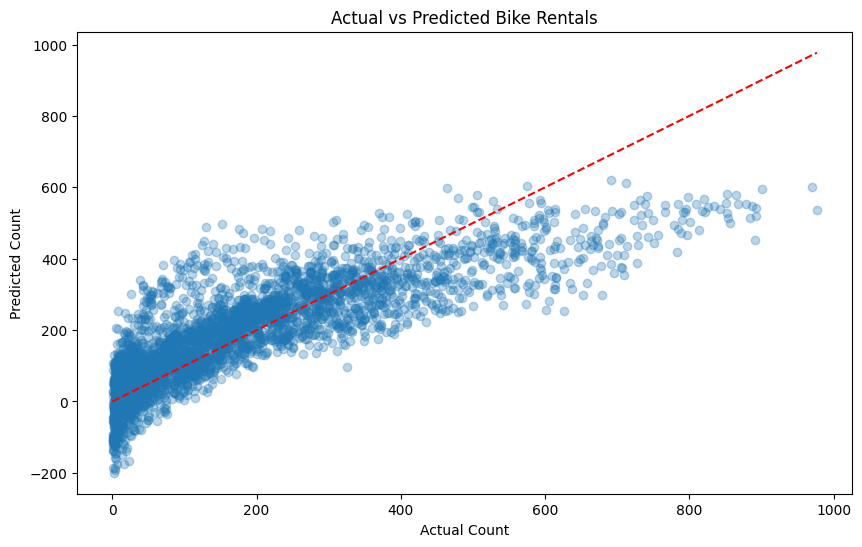

In [10]:
import matplotlib.pyplot as plt

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Count')
plt.ylabel('Predicted Count')
plt.title('Actual vs Predicted Bike Rentals')
plt.show()


**5. Implement L2 and L1 Penalties (Regularization)**

**5.1. Ridge Regression (L2 Penalty)**

In [11]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

# Calculate errors
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)

mae_ridge, mse_ridge, rmse_ridge


(74.10407857118349, 10089.259227762752, 100.44530465762325)

**5.2. Lasso Regression (L1 Penalty)**

In [12]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

# Calculate errors
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)

mae_lasso, mse_lasso, rmse_lasso


(74.02479753108358, 10085.287259505345, 100.42553091472978)

**6. Analyze the Impact of Regularization**

In [13]:
# Compare the performance metrics
performance = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression'],
    'MAE': [mae, mae_ridge, mae_lasso],
    'MSE': [mse, mse_ridge, mse_lasso],
    'RMSE': [rmse, rmse_ridge, rmse_lasso]
})

performance

# Analyze coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Linear Regression': model.coef_,
    'Ridge Regression': ridge_model.coef_,
    'Lasso Regression': lasso_model.coef_
})

coefficients


,Feature,Linear Regression,Ridge Regression,Lasso Regression
0,temp,2.178641e+01,21.779789,23.454080
1,atemp,2.127457e+01,21.262626,20.979184
2,hum,-1.580165e+01,-15.795451,-16.019569
3,windspeed,-3.802116e+00,-3.784255,-3.627362
4,season_2,1.473746e+01,14.704892,15.008943
5,season_3,1.331159e+01,13.297249,12.722327
6,season_4,2.945180e+01,29.400230,28.505924
7,yr_1,4.295410e+01,42.987118,42.806622
8,mnth_2,5.218199e-01,0.524001,0.000000
9,mnth_3,4.076128e+00,4.126683,3.247708
